In [0]:
"""
https://gym.openai.com/
"""

import numpy as np
import matplotlib.pyplot as plt
import gym
from gym.envs.registration import register

In [0]:
register(id='FrozenLakeNotSlippery-v0',
         entry_point='gym.envs.toy_text:FrozenLakeEnv',
         kwargs={'map_name':'4x4', 'is_slippery':False},
         )
        # "SFFF",
        # "FHFH",
        # "FFFH",
        # "HFFG"    

In [3]:
env =gym.make("FrozenLakeNotSlippery-v0")
env.reset()

0

In [0]:
# LEFT = 0
# DOWN = 1
# RIGHT = 2
# UP = 3

In [4]:
complete_actions = [2, 2, 1, 1, 1, 2]
for action in complete_actions:
  new_state, reward, done, _ = env.step(action) # action을 적용할 떄 쓰는 함수
  env.render() # 현재 state 출력
  if done is True:
    print("도착, reward: {}".format(reward))

  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
도착, reward: 1.0


In [0]:
# is_slippery 속성이 True 일 때, exploration과 유사
register(id='FrozenLakeNotSlippery-v1',
         entry_point='gym.envs.toy_text:FrozenLakeEnv',
         kwargs={'map_name':'4x4', 'is_slippery':True},
         )
        # "SFFF",
        # "FHFH",
        # "FFFH",
        # "HFFG"    

In [6]:
env =gym.make("FrozenLakeNotSlippery-v1")
env.reset()
complete_actions = [2, 2, 1, 1, 1, 2]
for action in complete_actions:
  new_state, reward, done, _ = env.step(action) # action을 적용할 떄 쓰는 함수
  env.render() # 현재 state 출력
  if done is True:
    print("도착, reward: {}".format(reward))

  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
도착, reward: 0.0
  (Down)
SFFF
FHFH
FFFH
HFFG
도착, reward: 0
  (Down)
SFFF
FHFH
FFFH
HFFG
도착, reward: 0
  (Right)
SFFF
FHFH
FFFH
HFFG
도착, reward: 0


In [0]:
register(id='FrozenLakeNotSlippery-v2',
         entry_point='gym.envs.toy_text:FrozenLakeEnv',
         kwargs={'map_name':'4x4', 'is_slippery':False},
         )
        # "SFFF",
        # "FHFH",
        # "FFFH",
        # "HFFG"    

In [8]:
env =gym.make("FrozenLakeNotSlippery-v2")
env.render()


SFFF
FHFH
FFFH
HFFG


In [9]:
print(env.action_space) # Discrete(4) :  동작의 종류의 수
print(env.action_space.n) # 4 : action의 종류

Discrete(4)
4


In [10]:
import random
env.action_space.n
random.randint(0, env.action_space.n-1) # 0 ~ 3의 정수 중 랜덤으로 출력

3

Success rate:0.0175


<function matplotlib.pyplot.show>

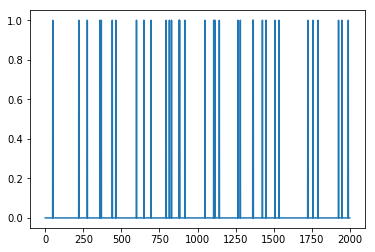

In [11]:
num_episodes = 2000
rList = []

for i in range(num_episodes):
  env.reset() # 매 episode 마다 반드시 초기화를 해줘야함
  done = False
  rAll = 0
  while not done:
    action = random.randint(0, env.action_space.n-1)
    _state, reward, done, _info = env.step(action)
    rAll += reward
  rList.append(rAll)
print("Success rate:" + str(sum(rList)/num_episodes))
plt.plot(rList)
plt.show

In [0]:
register(id='FrozenLakeNotSlippery-v3',
         entry_point='gym.envs.toy_text:FrozenLakeEnv',
         kwargs={'map_name':'4x4', 'is_slippery':False},
         )

In [0]:
env = gym.make('FrozenLakeNotSlippery-v3')

In [0]:
env.action_space.n
env.observation_space.n # 16 : state 개수

# Q 테이블 생성(16*4)
Q = np.zeros([env.observation_space.n,env.action_space.n])
num_episodes = 2000 

In [37]:
# 활용할 함수 연습
a = np.arange(3,10)
a
np.amax(a)
a = np.array([1,0,0,1,2,0])
np.nonzero(a) # 0이 아닌 인덱스 출력

(array([0, 3, 4]),)

In [0]:
import random as pr
def rargmax(vector) :
  m = np.amax(vector)
  indices = np.nonzero(vector == m)[0]
  return pr.choice(indices)

성공률 : 0.91
LEFT DOWN RIGHT UP
[[0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 0.]]


<function matplotlib.pyplot.show>

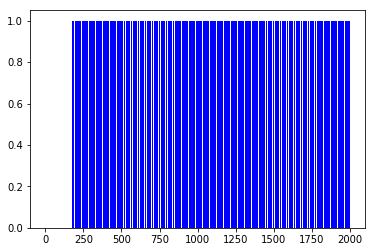

In [39]:
rList = []
for i in range(num_episodes) : 
  state = env.reset() # 0번 state에서 시작
  # print(state)
  done = False
  rAll = 0

  # Q 테이블 학습 알고리즘
  while not done:
    action = rargmax(Q[state, :]) # 현재 위치에서 최대값에 해당하는 동작 선택
    new_state, reward, done, _ = env.step(action) # 새로운 state, 보상(도착:1, 이외:0), 도착 여부(True, False). 정보 리턴
    Q[state, action] = reward + np.max(Q[new_state, :]) # Q의 state 위치 값 업데이트
    rAll += reward  
    state = new_state # state가 이동해야함
  rList.append(rAll)  
print("성공률 : " + str(sum(rList)/num_episodes))
print("LEFT DOWN RIGHT UP")
print(Q)
plt.bar(range(len(rList)), rList, color='blue')
plt.show

In [0]:
# gamma(discounted factor) 추가

In [0]:
register(id='FrozenLakeNotSlippery-v4',
         entry_point='gym.envs.toy_text:FrozenLakeEnv',
         kwargs={'map_name':'4x4', 'is_slippery':False},
         )

In [0]:
env = gym.make('FrozenLakeNotSlippery-v4')

In [0]:
# Q 테이블 생성(16*4)
Q = np.zeros([env.observation_space.n,env.action_space.n])
num_episodes = 2000 

In [0]:
dis = .89 # discounted factor

In [50]:
np.random.randn(1,4)

array([[-0.59266836, -0.99191902,  1.41451064,  1.18312072]])

성공률 : 0.9095
LEFT DOWN RIGHT UP
[[0.         0.55840594 0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.62742241 0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.704969   0.        ]
 [0.         0.7921     0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.89       0.        ]
 [0.         0.         1.         0.        ]
 [0.         0.         0.         0.        ]]


<function matplotlib.pyplot.show>

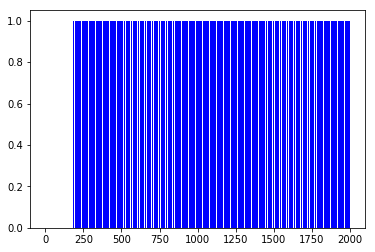

In [51]:
rList = []
for i in range(num_episodes) : 
  state = env.reset() # 0번 state에서 시작
  # print(state)
  done = False
  rAll = 0

  # Q 테이블 학습 알고리즘
  while not done:
    action = np.argmax(Q[state,:]+np.random.randn(1, env.action_space.n) / (i+1)) # episode가 많아질 수록 랜덤으로 미치는 영향값을 줄이고자 함
    new_state, reward, done, _ = env.step(action)
    Q[state, action] = reward + dis * np.max(Q[new_state, :]) # discount factor 추가
    rAll += reward  
    state = new_state # state가 이동해야함
  rList.append(rAll)  
print("성공률 : " + str(sum(rList)/num_episodes))
print("LEFT DOWN RIGHT UP")
print(Q)
plt.bar(range(len(rList)), rList, color='blue')
plt.show

# e-greedy
기존에 가보지 않은 곳에 랜덤하게 갈 수 있음

In [0]:
#register(id='FrozenLakeNotSlippery-v5',
         entry_point='gym.envs.toy_text:FrozenLakeEnv',
         kwargs={'map_name':'4x4', 'is_slippery':False},
         )

In [0]:
env = gym.make('FrozenLakeNotSlippery-v5')

In [0]:
# Q 테이블 생성(16*4)
Q = np.zeros([env.observation_space.n,env.action_space.n])
num_episodes = 2000 
dis = .89 # discounted factor

성공률 : 0.815
LEFT DOWN RIGHT UP
[[0.49698129 0.55840594 0.55840594 0.49698129]
 [0.49698129 0.         0.62742241 0.55840594]
 [0.55840594 0.704969   0.55840594 0.62742241]
 [0.62742241 0.         0.55840594 0.55840594]
 [0.55840594 0.62742241 0.         0.49698129]
 [0.         0.         0.         0.        ]
 [0.         0.7921     0.         0.62742241]
 [0.         0.         0.         0.        ]
 [0.62742241 0.         0.704969   0.55840594]
 [0.62742241 0.7921     0.7921     0.        ]
 [0.704969   0.89       0.         0.704969  ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.7921     0.89       0.704969  ]
 [0.7921     0.89       1.         0.7921    ]
 [0.         0.         0.         0.        ]]


<function matplotlib.pyplot.show>

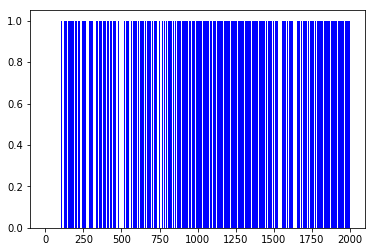

In [55]:
rList = []
for i in range(num_episodes) : 
  state = env.reset() # 0번 state에서 시작
  # print(state)
  done = False
  rAll = 0
  e = 1. / ((i//100)+1) # e: 1. -> 0.5 -> .. ->0.05

  # Q 테이블 학습 알고리즘
  while not done:
    # action = np.argmax(Q[state,:]+np.random.randn(1, env.action_space.n) / (i+1)) # episode가 많아질 수록 랜덤으로 미치는 영향값을 줄이고자 함
    if np.random.rand(1) < e : # random.rand : 0~1 사이 난수
      action=env.action_space.sample()
    else:
      action=np.argmax(Q[state, :])
      
    new_state, reward, done, _ = env.step(action)
    Q[state, action] = reward + dis * np.max(Q[new_state, :]) # discount factor 추가
    rAll += reward  
    state = new_state # state가 이동해야함
  rList.append(rAll)  
print("성공률 : " + str(sum(rList)/num_episodes))
print("LEFT DOWN RIGHT UP")
print(Q)
plt.bar(range(len(rList)), rList, color='blue')
plt.show

In [52]:
for i in range(num_episodes):
  print(1. / ((i//100)+1))

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.3333333333333333
0.3333333333333333
0.3333333333333333
0.3333333333333333
0.3333333333333333
0.3333333333333333
0.3333333333333333
0.3333333333333333
0.3333333333333333
0.3333333333333333
0.33333333

In [54]:
env.action_space.sample() # random 동작(action 중에 하나가 리턴됨)

3